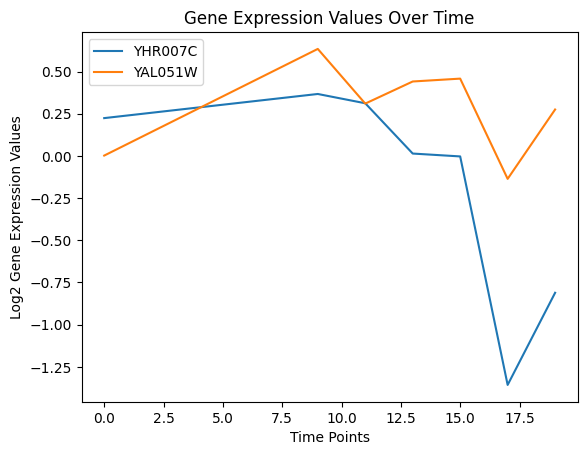

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('yeastExpression.txt', sep='\t')

time_points = [0, 9, 11, 13, 15, 17, 19]
vals1 = []
vals2 = []

for index, row in df.iterrows():
    if row[0] == "YHR007C":
        vals1 = row[1:].tolist()

    if row[0] == "YAL051W":
        vals2 = row[1:].tolist()

plt.plot(time_points, vals1, label='YHR007C')
plt.plot(time_points, vals2, label='YAL051W')

plt.xlabel('Time Points')
plt.ylabel('Log2 Gene Expression Values')
plt.title('Gene Expression Values Over Time')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import spearmanr

correlation, p_value = spearmanr(vals1, vals2)
print("Spearman correlation: ", correlation)


Spearman correlation:  0.5714285714285715


In [ ]:
import numpy as np

variances = {}

for index, row in df.iterrows():
  name = row[0]
  gene_var = np.var(row[1:])
  variances[name] = gene_var

variances = sorted(variances.items(), key=lambda x: x[1], reverse = True)

print(variances)
print("Gene with the maximum variance is ", variances[0][0], "with value", variances[0][1])
print("Gene with the minimum variance is ", variances[-1][0], "with value", variances[-1][1])


[('YJL009W', 9.88652506122449), ('YJL216C', 5.3065851428571404), ('YGL184C', 4.059729346938776), ('YGR225W', 3.72866648979592), ('YGR043C', 3.3613813877551024), ('YKL217W', 3.3349645306122446), ('YDR398W', 3.2582966938775506), ('YNL194C', 3.1438308163265307), ('YGR236C', 3.0323779591836737), ('YDL204W', 2.955110693877551), ('YAL054C', 2.896609551020408), ('YIL136W', 2.868297836734694), ('YGR243W', 2.820538979591837), ('YGR248W', 2.6543019183673464), ('YLR174W', 2.6114199591836735), ('YCR021C', 2.562294571428571), ('YJR095W', 2.530414408163266), ('YNL036W', 2.424772204081633), ('YKL026C', 2.3458588163265306), ('YFR015C', 2.327537836734694), ('YMR206W', 2.2864836326530615), ('YBL049W', 2.2535910612244896), ('YGL138C', 2.2463241224489794), ('YMR114C', 2.2336184897959184), ('YLR149C', 2.1754045306122447), ('YKR097W', 2.164353428571429), ('YGR088W', 2.162837265306122), ('YFL014W', 2.159548775510204), ('YLR377C', 2.1590476326530617), ('YKL187C', 2.132076979591837), ('YML128C', 2.118840408163

In [ ]:
new_variances = {}

for i in range(0,800):
  key = variances[i][0]
  value = variances[i][1]

  new_variances[key] = value


new_variances = sorted(new_variances.items(), key=lambda x: x[1], reverse = True)

print(new_variances)

print("The gene with the lowest variance is", new_variances[-1][0], "with value", new_variances[-1][1])

[('YJL009W', 9.88652506122449), ('YJL216C', 5.3065851428571404), ('YGL184C', 4.059729346938776), ('YGR225W', 3.72866648979592), ('YGR043C', 3.3613813877551024), ('YKL217W', 3.3349645306122446), ('YDR398W', 3.2582966938775506), ('YNL194C', 3.1438308163265307), ('YGR236C', 3.0323779591836737), ('YDL204W', 2.955110693877551), ('YAL054C', 2.896609551020408), ('YIL136W', 2.868297836734694), ('YGR243W', 2.820538979591837), ('YGR248W', 2.6543019183673464), ('YLR174W', 2.6114199591836735), ('YCR021C', 2.562294571428571), ('YJR095W', 2.530414408163266), ('YNL036W', 2.424772204081633), ('YKL026C', 2.3458588163265306), ('YFR015C', 2.327537836734694), ('YMR206W', 2.2864836326530615), ('YBL049W', 2.2535910612244896), ('YGL138C', 2.2463241224489794), ('YMR114C', 2.2336184897959184), ('YLR149C', 2.1754045306122447), ('YKR097W', 2.164353428571429), ('YGR088W', 2.162837265306122), ('YFL014W', 2.159548775510204), ('YLR377C', 2.1590476326530617), ('YKL187C', 2.132076979591837), ('YML128C', 2.118840408163

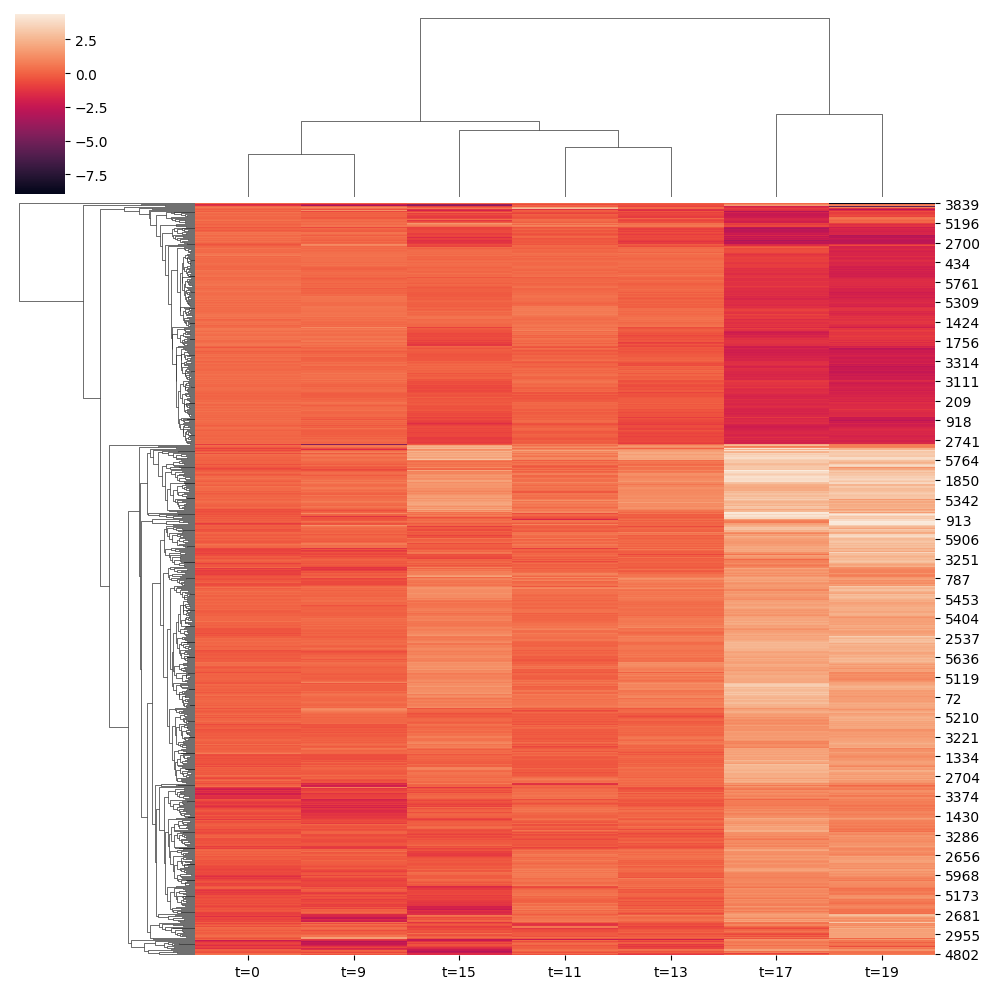

In [ ]:
import seaborn as sns

df = pd.read_csv('yeastExpression.txt', sep='\t')

for index, row in df.iterrows():
  #print(index)
  name = row[0]
  #print(name)
  gene_var = np.var(row[1:])

  if gene_var < new_variances[-1][1]:
    df.drop([index], axis=0, inplace=True)



df = df.drop(df.columns[0], axis=1)
sns.clustermap(df)